In [55]:
import keras
from xcml import *
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, Add
from keras import regularizers
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sebastian/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['reshape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
feat = np.genfromtxt('../../exchange_ml/data/processed/monomers/final_small/descriptors_coeff.dat', delimiter = ',')
tar = np.genfromtxt('../../exchange_ml/data/processed/monomers/final_small/energies.dat', delimiter = ',') -\
 np.genfromtxt('../../exchange_ml/data/processed/monomers/final_small/energies_siesta.dat', delimiter = ',')
tar -= np.mean(tar)

In [51]:
scaler = MinMaxScaler()
feat = scaler.fit_transform(feat)
feat_o = feat[:,:18]
feat_h1 = feat[:,18:26]
feat_h2 = feat[:,26:34]


In [72]:
b = 0
inputs_o = Input(shape = (18,)) 
x_o = Dense(units=16, activation='sigmoid', kernel_regularizer=regularizers.l2(b), input_dim=50)(inputs_o)
predictions_o = Dense(units=1, activation='linear', kernel_regularizer=regularizers.l2(b))(x_o)


H_layer = Dense(units=16, activation='sigmoid', kernel_regularizer=regularizers.l2(b))
H_out = Dense(units=1, activation='linear', kernel_regularizer=regularizers.l2(b))

inputs_h1 = Input(shape = (8,)) 
x_h1 = H_layer(inputs_h1)
predictions_h1 = H_out(x_h1)

inputs_h2 = Input(shape = (8,)) 
x_h2 = H_layer(inputs_h2)
predictions_h2 = H_out(x_h2)

predictions = Add()([predictions_o, predictions_h1, predictions_h2])

model = Model(inputs = [inputs_o, inputs_h1, inputs_h2], outputs=predictions)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['accuracy'])

# X_train, X_valid, y_train, y_valid = train_test_split(feat, 
#                                                     tar, 
#                                                     shuffle =True, random_state = 42, test_size = 0.2)

In [74]:
model.fit([feat_o,feat_h1,feat_h2],tar, epochs=1000, batch_size=32)

Epoch 1/1000
300/300 [==============================] - 0s 315us/step - loss: 6.9124e-04 - acc: 0.0000e+00
Epoch 2/1000
300/300 [==============================] - 0s 105us/step - loss: 6.7296e-04 - acc: 0.0000e+00
Epoch 3/1000
300/300 [==============================] - 0s 76us/step - loss: 6.4738e-04 - acc: 0.0000e+00
Epoch 4/1000
300/300 [==============================] - 0s 77us/step - loss: 6.2723e-04 - acc: 0.0000e+00
Epoch 5/1000
300/300 [==============================] - 0s 80us/step - loss: 6.0610e-04 - acc: 0.0000e+00
Epoch 6/1000
300/300 [==============================] - 0s 75us/step - loss: 5.8951e-04 - acc: 0.0000e+00
Epoch 7/1000
300/300 [==============================] - 0s 83us/step - loss: 5.7268e-04 - acc: 0.0000e+00
Epoch 8/1000
300/300 [==============================] - 0s 95us/step - loss: 5.4931e-04 - acc: 0.0000e+00
Epoch 9/1000
300/300 [==============================] - 0s 73us/step - loss: 5.3155e-04 - acc: 0.0000e+00
Epoch 10/1000
300/300 [=====================

300/300 [==============================] - 0s 89us/step - loss: 1.0254e-04 - acc: 0.0000e+00
Epoch 78/1000
300/300 [==============================] - 0s 121us/step - loss: 1.0105e-04 - acc: 0.0000e+00
Epoch 79/1000
300/300 [==============================] - 0s 84us/step - loss: 9.9844e-05 - acc: 0.0000e+00
Epoch 80/1000
300/300 [==============================] - 0s 70us/step - loss: 9.9247e-05 - acc: 0.0000e+00
Epoch 81/1000
300/300 [==============================] - 0s 65us/step - loss: 9.7829e-05 - acc: 0.0000e+00
Epoch 82/1000
300/300 [==============================] - 0s 67us/step - loss: 9.7300e-05 - acc: 0.0000e+00
Epoch 83/1000
300/300 [==============================] - 0s 62us/step - loss: 9.6766e-05 - acc: 0.0000e+00
Epoch 84/1000
300/300 [==============================] - 0s 90us/step - loss: 9.5426e-05 - acc: 0.0000e+00
Epoch 85/1000
300/300 [==============================] - 0s 64us/step - loss: 9.4606e-05 - acc: 0.0000e+00
Epoch 86/1000
300/300 [===========================

300/300 [==============================] - 0s 62us/step - loss: 6.5329e-05 - acc: 0.0000e+00
Epoch 154/1000
300/300 [==============================] - 0s 74us/step - loss: 6.5113e-05 - acc: 0.0000e+00
Epoch 155/1000
300/300 [==============================] - 0s 73us/step - loss: 6.4810e-05 - acc: 0.0000e+00
Epoch 156/1000
300/300 [==============================] - 0s 68us/step - loss: 6.4638e-05 - acc: 0.0000e+00
Epoch 157/1000
300/300 [==============================] - 0s 73us/step - loss: 6.4240e-05 - acc: 0.0000e+00
Epoch 158/1000
300/300 [==============================] - 0s 75us/step - loss: 6.4115e-05 - acc: 0.0000e+00
Epoch 159/1000
300/300 [==============================] - ETA: 0s - loss: 1.0799e-04 - acc: 0.0000e+0 - 0s 60us/step - loss: 6.3985e-05 - acc: 0.0000e+00
Epoch 160/1000
300/300 [==============================] - 0s 78us/step - loss: 6.4796e-05 - acc: 0.0000e+00
Epoch 161/1000
300/300 [==============================] - 0s 67us/step - loss: 6.4468e-05 - acc: 0.0000e+

300/300 [==============================] - 0s 70us/step - loss: 4.9865e-05 - acc: 0.0000e+00
Epoch 229/1000
300/300 [==============================] - 0s 92us/step - loss: 4.8207e-05 - acc: 0.0000e+00
Epoch 230/1000
300/300 [==============================] - 0s 73us/step - loss: 4.8881e-05 - acc: 0.0000e+00
Epoch 231/1000
300/300 [==============================] - 0s 61us/step - loss: 4.8039e-05 - acc: 0.0000e+00
Epoch 232/1000
300/300 [==============================] - 0s 69us/step - loss: 4.8849e-05 - acc: 0.0000e+00
Epoch 233/1000
300/300 [==============================] - 0s 73us/step - loss: 4.7798e-05 - acc: 0.0000e+00
Epoch 234/1000
300/300 [==============================] - 0s 64us/step - loss: 4.7358e-05 - acc: 0.0000e+00
Epoch 235/1000
300/300 [==============================] - 0s 74us/step - loss: 4.7300e-05 - acc: 0.0000e+00
Epoch 236/1000
300/300 [==============================] - 0s 72us/step - loss: 4.7967e-05 - acc: 0.0000e+00
Epoch 237/1000
300/300 [===================

300/300 [==============================] - 0s 72us/step - loss: 4.0318e-05 - acc: 0.0000e+00
Epoch 304/1000
300/300 [==============================] - 0s 92us/step - loss: 4.0096e-05 - acc: 0.0000e+00
Epoch 305/1000
300/300 [==============================] - 0s 63us/step - loss: 4.2811e-05 - acc: 0.0000e+00
Epoch 306/1000
300/300 [==============================] - 0s 65us/step - loss: 4.1037e-05 - acc: 0.0000e+00
Epoch 307/1000
300/300 [==============================] - 0s 77us/step - loss: 3.9437e-05 - acc: 0.0000e+00
Epoch 308/1000
300/300 [==============================] - 0s 69us/step - loss: 3.9597e-05 - acc: 0.0000e+00
Epoch 309/1000
300/300 [==============================] - 0s 64us/step - loss: 4.0143e-05 - acc: 0.0000e+00
Epoch 310/1000
300/300 [==============================] - 0s 63us/step - loss: 3.9259e-05 - acc: 0.0000e+00
Epoch 311/1000
300/300 [==============================] - 0s 75us/step - loss: 4.0675e-05 - acc: 0.0000e+00
Epoch 312/1000
300/300 [===================

Epoch 379/1000
300/300 [==============================] - 0s 90us/step - loss: 3.4850e-05 - acc: 0.0000e+00
Epoch 380/1000
300/300 [==============================] - 0s 78us/step - loss: 3.5258e-05 - acc: 0.0000e+00
Epoch 381/1000
300/300 [==============================] - 0s 63us/step - loss: 3.7813e-05 - acc: 0.0000e+00
Epoch 382/1000
300/300 [==============================] - 0s 80us/step - loss: 3.6441e-05 - acc: 0.0000e+00
Epoch 383/1000
300/300 [==============================] - 0s 68us/step - loss: 3.5409e-05 - acc: 0.0000e+00
Epoch 384/1000
300/300 [==============================] - 0s 63us/step - loss: 3.5317e-05 - acc: 0.0000e+00
Epoch 385/1000
300/300 [==============================] - 0s 89us/step - loss: 3.4479e-05 - acc: 0.0000e+00
Epoch 386/1000
300/300 [==============================] - 0s 63us/step - loss: 3.4795e-05 - acc: 0.0000e+00
Epoch 387/1000
300/300 [==============================] - 0s 59us/step - loss: 3.4710e-05 - acc: 0.0000e+00
Epoch 388/1000
300/300 [====

300/300 [==============================] - 0s 58us/step - loss: 3.6932e-05 - acc: 0.0000e+00
Epoch 455/1000
300/300 [==============================] - 0s 124us/step - loss: 3.2876e-05 - acc: 0.0000e+00
Epoch 456/1000
300/300 [==============================] - 0s 67us/step - loss: 3.1835e-05 - acc: 0.0000e+00
Epoch 457/1000
300/300 [==============================] - 0s 76us/step - loss: 3.1271e-05 - acc: 0.0000e+00
Epoch 458/1000
300/300 [==============================] - 0s 65us/step - loss: 3.0547e-05 - acc: 0.0000e+00
Epoch 459/1000
300/300 [==============================] - 0s 82us/step - loss: 3.1879e-05 - acc: 0.0000e+00
Epoch 460/1000
300/300 [==============================] - 0s 62us/step - loss: 3.4689e-05 - acc: 0.0000e+00
Epoch 461/1000
300/300 [==============================] - 0s 86us/step - loss: 3.0687e-05 - acc: 0.0000e+00
Epoch 462/1000
300/300 [==============================] - 0s 92us/step - loss: 3.0501e-05 - acc: 0.0000e+00
Epoch 463/1000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 2.9180e-05 - acc: 0.0000e+00
Epoch 529/1000
300/300 [==============================] - 0s 109us/step - loss: 2.8034e-05 - acc: 0.0000e+00
Epoch 530/1000
300/300 [==============================] - 0s 92us/step - loss: 2.9651e-05 - acc: 0.0000e+00
Epoch 531/1000
300/300 [==============================] - 0s 82us/step - loss: 2.8827e-05 - acc: 0.0000e+00
Epoch 532/1000
300/300 [==============================] - 0s 76us/step - loss: 2.5872e-05 - acc: 0.0000e+00
Epoch 533/1000
300/300 [==============================] - 0s 84us/step - loss: 2.6749e-05 - acc: 0.0000e+00
Epoch 534/1000
300/300 [==============================] - 0s 91us/step - loss: 2.5972e-05 - acc: 0.0000e+00
Epoch 535/1000
300/300 [==============================] - 0s 79us/step - loss: 2.8655e-05 - acc: 0.0000e+00
Epoch 536/1000
300/300 [==============================] - 0s 87us/step - loss: 2.7808e-05 - acc: 0.0000e+00
Epoch 537/1000
300/300 [==================

300/300 [==============================] - 0s 97us/step - loss: 2.3612e-05 - acc: 0.0000e+00
Epoch 604/1000
300/300 [==============================] - 0s 76us/step - loss: 2.4184e-05 - acc: 0.0000e+00
Epoch 605/1000
300/300 [==============================] - 0s 58us/step - loss: 2.1498e-05 - acc: 0.0000e+00
Epoch 606/1000
300/300 [==============================] - 0s 62us/step - loss: 2.2520e-05 - acc: 0.0000e+00
Epoch 607/1000
300/300 [==============================] - 0s 70us/step - loss: 2.3082e-05 - acc: 0.0000e+00
Epoch 608/1000
300/300 [==============================] - 0s 71us/step - loss: 2.2883e-05 - acc: 0.0000e+00
Epoch 609/1000
300/300 [==============================] - 0s 72us/step - loss: 2.3482e-05 - acc: 0.0000e+00
Epoch 610/1000
300/300 [==============================] - 0s 68us/step - loss: 2.6671e-05 - acc: 0.0000e+00
Epoch 611/1000
300/300 [==============================] - 0s 72us/step - loss: 2.1937e-05 - acc: 0.0000e+00
Epoch 612/1000
300/300 [===================

300/300 [==============================] - 0s 99us/step - loss: 1.8896e-05 - acc: 0.0000e+00
Epoch 679/1000
300/300 [==============================] - 0s 72us/step - loss: 1.8758e-05 - acc: 0.0000e+00
Epoch 680/1000
300/300 [==============================] - 0s 67us/step - loss: 2.2014e-05 - acc: 0.0000e+00
Epoch 681/1000
300/300 [==============================] - 0s 91us/step - loss: 1.8585e-05 - acc: 0.0000e+00
Epoch 682/1000
300/300 [==============================] - 0s 68us/step - loss: 1.7800e-05 - acc: 0.0000e+00
Epoch 683/1000
300/300 [==============================] - 0s 80us/step - loss: 2.0689e-05 - acc: 0.0000e+00
Epoch 684/1000
300/300 [==============================] - 0s 66us/step - loss: 2.5146e-05 - acc: 0.0000e+00
Epoch 685/1000
300/300 [==============================] - 0s 70us/step - loss: 1.8971e-05 - acc: 0.0000e+00
Epoch 686/1000
300/300 [==============================] - 0s 84us/step - loss: 1.9946e-05 - acc: 0.0000e+00
Epoch 687/1000
300/300 [===================

Epoch 754/1000
300/300 [==============================] - 0s 57us/step - loss: 2.1540e-05 - acc: 0.0000e+00
Epoch 755/1000
300/300 [==============================] - 0s 71us/step - loss: 1.7716e-05 - acc: 0.0000e+00
Epoch 756/1000
300/300 [==============================] - 0s 64us/step - loss: 1.3784e-05 - acc: 0.0000e+00
Epoch 757/1000
300/300 [==============================] - 0s 63us/step - loss: 2.3653e-05 - acc: 0.0000e+00
Epoch 758/1000
300/300 [==============================] - 0s 79us/step - loss: 1.5209e-05 - acc: 0.0000e+00
Epoch 759/1000
300/300 [==============================] - 0s 72us/step - loss: 1.6776e-05 - acc: 0.0000e+00
Epoch 760/1000
300/300 [==============================] - 0s 63us/step - loss: 2.6252e-05 - acc: 0.0000e+00
Epoch 761/1000
300/300 [==============================] - 0s 70us/step - loss: 2.5793e-05 - acc: 0.0000e+00
Epoch 762/1000
300/300 [==============================] - 0s 69us/step - loss: 1.9292e-05 - acc: 0.0000e+00
Epoch 763/1000
300/300 [====

300/300 [==============================] - 0s 86us/step - loss: 2.4957e-05 - acc: 0.0000e+00
Epoch 830/1000
300/300 [==============================] - 0s 70us/step - loss: 1.8983e-05 - acc: 0.0000e+00
Epoch 831/1000
300/300 [==============================] - 0s 64us/step - loss: 1.5228e-05 - acc: 0.0000e+00
Epoch 832/1000
300/300 [==============================] - 0s 72us/step - loss: 1.2102e-05 - acc: 0.0000e+00
Epoch 833/1000
300/300 [==============================] - 0s 69us/step - loss: 1.1559e-05 - acc: 0.0000e+00
Epoch 834/1000
300/300 [==============================] - 0s 70us/step - loss: 1.1458e-05 - acc: 0.0000e+00
Epoch 835/1000
300/300 [==============================] - 0s 72us/step - loss: 1.1544e-05 - acc: 0.0000e+00
Epoch 836/1000
300/300 [==============================] - 0s 71us/step - loss: 1.1342e-05 - acc: 0.0000e+00
Epoch 837/1000
300/300 [==============================] - 0s 66us/step - loss: 1.2111e-05 - acc: 0.0000e+00
Epoch 838/1000
300/300 [===================

Epoch 905/1000
300/300 [==============================] - 0s 53us/step - loss: 1.0500e-05 - acc: 0.0000e+00
Epoch 906/1000
300/300 [==============================] - 0s 73us/step - loss: 1.1221e-05 - acc: 0.0000e+00
Epoch 907/1000
300/300 [==============================] - 0s 70us/step - loss: 1.0969e-05 - acc: 0.0000e+00
Epoch 908/1000
300/300 [==============================] - 0s 61us/step - loss: 1.1497e-05 - acc: 0.0000e+00
Epoch 909/1000
300/300 [==============================] - 0s 59us/step - loss: 1.6651e-05 - acc: 0.0000e+00
Epoch 910/1000
300/300 [==============================] - 0s 78us/step - loss: 1.7532e-05 - acc: 0.0000e+00
Epoch 911/1000
300/300 [==============================] - 0s 62us/step - loss: 2.0363e-05 - acc: 0.0000e+00
Epoch 912/1000
300/300 [==============================] - 0s 63us/step - loss: 2.0983e-05 - acc: 0.0000e+00
Epoch 913/1000
300/300 [==============================] - 0s 80us/step - loss: 1.2474e-05 - acc: 0.0000e+00
Epoch 914/1000
300/300 [====

300/300 [==============================] - 0s 76us/step - loss: 7.6538e-06 - acc: 0.0000e+00
Epoch 981/1000
300/300 [==============================] - 0s 83us/step - loss: 8.6678e-06 - acc: 0.0000e+00
Epoch 982/1000
300/300 [==============================] - 0s 68us/step - loss: 7.3523e-06 - acc: 0.0000e+00
Epoch 983/1000
300/300 [==============================] - 0s 63us/step - loss: 9.8944e-06 - acc: 0.0000e+00
Epoch 984/1000
300/300 [==============================] - 0s 72us/step - loss: 1.1672e-05 - acc: 0.0000e+00
Epoch 985/1000
300/300 [==============================] - 0s 66us/step - loss: 8.1654e-06 - acc: 0.0000e+00
Epoch 986/1000
300/300 [==============================] - 0s 66us/step - loss: 1.5034e-05 - acc: 0.0000e+00
Epoch 987/1000
300/300 [==============================] - 0s 85us/step - loss: 9.5520e-06 - acc: 0.0000e+00
Epoch 988/1000
300/300 [==============================] - 0s 68us/step - loss: 1.2192e-05 - acc: 0.0000e+00
Epoch 989/1000
300/300 [===================

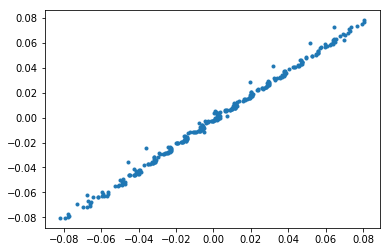

In [75]:
plot(model.predict([feat_o,feat_h1,feat_h2]), tar, ls = '', marker = '.')

In [76]:
model.get_output_at(0)

<tf.Tensor 'add_8/add_1:0' shape=(?, 1) dtype=float32>

In [80]:
model_o = Model(inputs = [inputs_o], outputs=predictions_o)
model_h1 = Model(inputs = [inputs_h1], outputs=predictions_h1)
model_h2 = Model(inputs = [inputs_h2], outputs=predictions_h2)


In [82]:
np.allclose(model.predict([feat_o,feat_h1,feat_h2]),
            model_o.predict(feat_o) + model_h1.predict(feat_h1) + model_h2.predict(feat_h2))

True

In [83]:
model_o.predict(feat_o)

array([[ 0.81611985],
       [ 0.81806415],
       [ 0.81813848],
       [ 0.81636256],
       [ 0.8136605 ],
       [ 0.81556535],
       [ 0.82025445],
       [ 0.82023257],
       [ 0.81410313],
       [ 0.81832534],
       [ 0.81632912],
       [ 0.82143915],
       [ 0.81715775],
       [ 0.81734633],
       [ 0.8176024 ],
       [ 0.81346101],
       [ 0.81236869],
       [ 0.81823635],
       [ 0.8206827 ],
       [ 0.81411743],
       [ 0.81164706],
       [ 0.81943023],
       [ 0.81050539],
       [ 0.82135862],
       [ 0.81940639],
       [ 0.81527531],
       [ 0.82214248],
       [ 0.81368005],
       [ 0.81586123],
       [ 0.81396121],
       [ 0.81200224],
       [ 0.82168996],
       [ 0.81194621],
       [ 0.81989527],
       [ 0.81965089],
       [ 0.82318777],
       [ 0.81544155],
       [ 0.80892134],
       [ 0.80770582],
       [ 0.82178962],
       [ 0.81395674],
       [ 0.8235777 ],
       [ 0.81391108],
       [ 0.81906629],
       [ 0.81609547],
       [ 0